In [85]:
import os
import pandas as pd
import csv
import numpy as np
import time

from datetime import datetime
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [87]:
cp_data = pd.read_csv("/home/aayush/accelerometer/accprocess/data_saved/cp.csv")
walmsley_data = pd.read_csv("/home/aayush/accelerometer/accprocess/data_saved/walmsley.csv")

In [88]:
cp_data = cp_data[["time_cp_predicted", "activity_predicted", "participant_id", "annotation"]]
cp_data[cp_data["activity_predicted"].isna()]
print(len(cp_data))
cp_data = cp_data.drop_duplicates(subset=["time_cp_predicted", "participant_id"])
print(len(cp_data))
cp_data

192374
192374


,time_cp_predicted,activity_predicted,participant_id,annotation
0,2016-11-13 08:02:30,CpMVPA,1,light
1,2016-11-13 08:03:00,CpLPA,1,light
2,2016-11-13 08:03:30,CpLPA,1,light
3,2016-11-13 08:04:00,CpLPA,1,light
4,2016-11-13 08:04:30,CpSB,1,light
...,...,...,...,...
192369,2016-06-12 02:09:30,CpSB,151,sleep
192370,2016-06-12 02:10:00,CpSB,151,sleep
192371,2016-06-12 02:10:30,CpLPA,151,sleep
192372,2016-06-12 02:11:00,CpMVPA,151,sleep


In [89]:
walmsley_data = walmsley_data[["time_walmsley_predicted", "activity_predicted", "participant_id", "annotation"]]
walmsley_data[walmsley_data["activity_predicted"].isna()]
print(len(walmsley_data))
walmsley_data = walmsley_data.drop_duplicates(subset = ["time_walmsley_predicted", "participant_id"])
print(len(walmsley_data))
walmsley_data

293056
293056


,time_walmsley_predicted,activity_predicted,participant_id,annotation
0,2016-11-13 02:18:00,sleep,1,sleep
1,2016-11-13 02:18:30,sleep,1,sleep
2,2016-11-13 02:19:00,sleep,1,sleep
3,2016-11-13 02:19:30,sleep,1,sleep
4,2016-11-13 02:20:00,sleep,1,sleep
...,...,...,...,...
293051,2016-06-12 06:17:00,sleep,151,sleep
293052,2016-06-12 06:17:30,sleep,151,sleep
293053,2016-06-12 06:18:00,sleep,151,sleep
293054,2016-06-12 06:18:30,sleep,151,sleep


In [92]:
walmsley_data[walmsley_data["participant_id"]==2]

,time,activity_predicted,participant_id,annotation
2355,2016-05-21 02:53:00,sleep,2,sleep
2356,2016-05-21 02:53:30,sleep,2,sleep
2357,2016-05-21 02:54:00,sleep,2,sleep
2358,2016-05-21 02:54:30,sleep,2,sleep
2359,2016-05-21 02:55:00,sleep,2,sleep
...,...,...,...,...
4113,2016-05-22 02:21:00,sleep,2,sleep
4114,2016-05-22 02:21:30,sleep,2,sleep
4115,2016-05-22 02:22:00,sleep,2,sleep
4116,2016-05-22 02:22:30,sleep,2,sleep


In [96]:
# Rename the time columns to have the same name
cp_data = cp_data.rename(columns={'time_cp_predicted': 'time'})
walmsley_data = walmsley_data.rename(columns={'time_walmsley_predicted': 'time'})

# Merge the DataFrames on the common 'time' column
merged_df = cp_data.merge(walmsley_data, on='time', suffixes=('_cp_predicted', '_walmsley_predicted'))

# Display the resulting DataFrame
merged_df.head()
len(merged_df)


172282

In [95]:
merged_df[merged_df["participant_id_walmsley_predicted"]==2]

,time,activity_predicted_cp_predicted,participant_id_cp_predicted,annotation_cp_predicted,activity_predicted_walmsley_predicted,participant_id_walmsley_predicted,annotation_walmsley_predicted
1659,2016-05-21 07:37:30,CpSB,2,light,sedentary,2,light
1661,2016-05-21 07:37:30,CpSB,73,sedentary,sedentary,2,light
1663,2016-05-21 07:38:00,CpSB,2,light,sedentary,2,light
1665,2016-05-21 07:38:00,CpSB,73,sedentary,sedentary,2,light
1667,2016-05-21 07:38:30,CpSB,2,light,sedentary,2,light
...,...,...,...,...,...,...,...
111919,2016-05-22 02:21:00,CpSB,76,sleep,sleep,2,sleep
111921,2016-05-22 02:21:30,CpSB,76,sleep,sleep,2,sleep
111923,2016-05-22 02:22:00,CpSB,76,sleep,sleep,2,sleep
111925,2016-05-22 02:22:30,CpSB,76,sleep,sleep,2,sleep


In [71]:
# check if there are any discrepencies
print(len(merged_df))
differences = merged_df['participant_id_cp_predicted'] != merged_df['participant_id_walmsley_predicted']
different_rows = merged_df[differences]
different_rows

172282


,time,activity_predicted_cp_predicted,participant_id_cp_predicted,annotation_cp_predicted,activity_predicted_walmsley_predicted,participant_id_walmsley_predicted,annotation_walmsley_predicted
1660,2016-05-21 07:37:30,CpSB,2,light,sedentary,73,sedentary
1661,2016-05-21 07:37:30,CpSB,73,sedentary,sedentary,2,light
1664,2016-05-21 07:38:00,CpSB,2,light,sedentary,73,sedentary
1665,2016-05-21 07:38:00,CpSB,73,sedentary,sedentary,2,light
1668,2016-05-21 07:38:30,CpSB,2,light,sedentary,73,sedentary
...,...,...,...,...,...,...,...
172253,2016-06-12 02:00:00,CpSB,151,sleep,sleep,12,sleep
172255,2016-06-12 02:00:30,CpSB,151,sleep,sleep,12,sleep
172257,2016-06-12 02:01:00,CpSB,151,sleep,sleep,12,sleep
172259,2016-06-12 02:01:30,CpSB,151,sleep,sleep,12,sleep


In [72]:
# keep only those rows where participant IDs and time stamps match
merged_df = merged_df[merged_df['participant_id_cp_predicted'] == merged_df['participant_id_walmsley_predicted']]
print(len(merged_df))

138165


In [73]:
# check if there are any discrepencies
differences = merged_df['annotation_walmsley_predicted'] != merged_df['annotation_cp_predicted']
different_rows = merged_df[differences]
different_rows


,time,activity_predicted_cp_predicted,participant_id_cp_predicted,annotation_cp_predicted,activity_predicted_walmsley_predicted,participant_id_walmsley_predicted,annotation_walmsley_predicted


In [74]:
merged_df.to_csv("/home/aayush/accelerometer/accprocess/data_saved/merged_cp_walmsley.csv", index=False)

In [75]:
merged_df = merged_df[["time", "activity_predicted_cp_predicted", "participant_id_cp_predicted", "annotation_cp_predicted", "activity_predicted_walmsley_predicted"]]
merged_df = merged_df.rename(columns={"participant_id_cp_predicted": "participant_id", "annotation_cp_predicted": "annotation"})
merged_df.head()



,time,activity_predicted_cp_predicted,participant_id,annotation,activity_predicted_walmsley_predicted
0,2016-11-13 08:02:30,CpMVPA,1,light,light
1,2016-11-13 08:03:00,CpLPA,1,light,light
2,2016-11-13 08:03:30,CpLPA,1,light,light
3,2016-11-13 08:04:00,CpLPA,1,light,light
4,2016-11-13 08:04:30,CpSB,1,light,light


In [83]:
merged_df[merged_df["participant_id"]==2]

,time,activity_predicted_cp_predicted,participant_id,annotation,activity_predicted_walmsley_predicted
1659,2016-05-21 07:37:30,sedentary,2,light,sedentary
1663,2016-05-21 07:38:00,sedentary,2,light,sedentary
1667,2016-05-21 07:38:30,sedentary,2,light,sedentary
1671,2016-05-21 07:39:00,sedentary,2,light,sedentary
1675,2016-05-21 07:39:30,sedentary,2,light,sedentary
...,...,...,...,...,...
5068,2016-05-21 20:16:30,moderate-vigorous,2,moderate-vigorous,light
5069,2016-05-21 20:17:00,moderate-vigorous,2,moderate-vigorous,light
5070,2016-05-21 20:17:30,light,2,moderate-vigorous,light
5071,2016-05-21 20:18:00,moderate-vigorous,2,moderate-vigorous,moderate-vigorous


In [76]:
cp_labels_dict = {'CpSB': ["sedentary"], 'CpLPA': ["light"], 'CpMVPA': ["moderate-vigorous"]}
print(cp_labels_dict)

flat_dict = {k: v[0] for k, v in cp_labels_dict.items()}
merged_df['activity_predicted_cp_predicted'].replace(flat_dict, inplace=True)

{'CpSB': ['sedentary'], 'CpLPA': ['light'], 'CpMVPA': ['moderate-vigorous']}


In [77]:
# group by gives a dictionary object with the distinct values from the by column as the keys
# group_keys will set those keys as the index of the resulting dataframe
cp_proportions = merged_df.groupby("participant_id", group_keys=True)["activity_predicted_cp_predicted"].value_counts(normalize=True).unstack()
walmsley_proportions = merged_df.groupby("participant_id", group_keys=True)["annotation"].value_counts(normalize=True).unstack()
annotation_proportions = merged_df.groupby("participant_id", group_keys=True)["activity_predicted_walmsley_predicted"].value_counts(normalize=True).unstack()

In [78]:
cp_proportions

activity_predicted_cp_predicted,light,moderate-vigorous,sedentary
participant_id,,,
1,0.216395,0.105485,0.678119
2,0.240248,0.259752,0.500000
3,0.253222,0.219105,0.527672
4,0.089502,0.026918,0.883580
5,0.232834,0.071785,0.695381
...,...,...,...
147,0.294493,0.409417,0.296089
148,0.178037,0.108153,0.713810
149,0.310848,0.264357,0.424795


In [79]:
walmsley_proportions

annotation,light,moderate-vigorous,sedentary,sleep
participant_id,,,,
1,0.426763,0.002411,0.522001,0.048825
2,0.161348,0.283688,0.554965,NaN
3,0.467779,NaN,0.532221,NaN
4,0.159489,0.022880,0.817631,NaN
5,0.386392,0.023096,0.570537,0.019975
...,...,...,...,...
147,0.482043,0.333599,0.184358,NaN
148,0.117304,0.156406,0.726290,NaN
149,0.617138,0.053783,0.316317,0.012762


In [80]:
annotation_proportions

activity_predicted_walmsley_predicted,light,moderate-vigorous,sedentary
participant_id,,,
1,0.441230,0.012055,0.546715
2,0.318262,0.214539,0.467199
3,0.543594,NaN,0.456406
4,0.125168,0.022207,0.852624
5,0.347066,0.046192,0.606742
...,...,...,...
147,0.379090,0.387869,0.233041
148,0.182196,0.145591,0.672213
149,0.723792,0.054695,0.221513


In [81]:
# Reindex the dataframes to have consistent columns
all_columns = sorted(set(cp_proportions.columns) | set(walmsley_proportions.columns) | set(annotation_proportions.columns))

cp_proportions = cp_proportions.reindex(columns=all_columns, fill_value=0)
walmsley_proportions = walmsley_proportions.reindex(columns=all_columns, fill_value=0)
annotation_proportions = annotation_proportions.reindex(columns=all_columns, fill_value=0)

# keep only first 20
cp_proportions = cp_proportions.head(20)
walmsley_proportions = walmsley_proportions.head(20)
annotation_proportions = annotation_proportions.head(20)



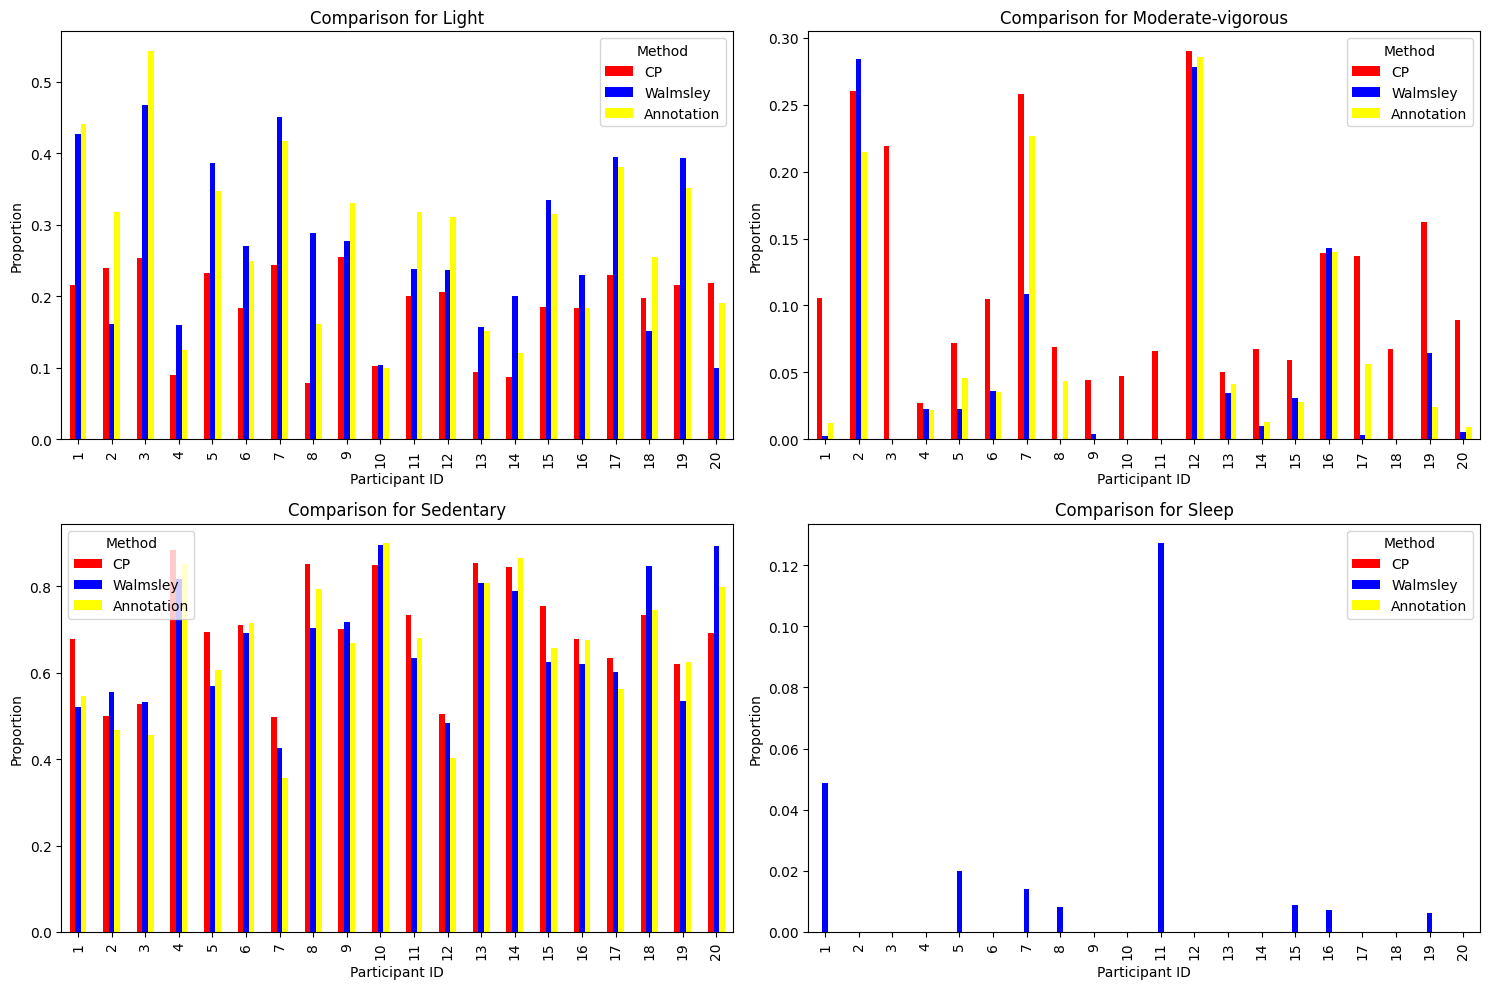

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# already set
# cp_proportions = cp_proportions.set_index("participant_id")
# walmsley_proportions = walmsley_proportions.set_index("participant_id")
# annotation_proportions = annotation_proportions.set_index("participant_id")

# List of classifications
classifications = ["light", "moderate-vigorous", "sedentary", "sleep"]

# Plotting the bar graphs
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
colors = ['red', 'blue', 'yellow'] 
for i, classification in enumerate(classifications):
    ax = axs[i//2, i%2]
    
    cp_data = cp_proportions[classification] if classification in cp_proportions.columns else [0] * len(cp_proportions)
    walmsley_data = walmsley_proportions[classification] if classification in walmsley_proportions.columns else [0] * len(walmsley_proportions)
    annotation_data = annotation_proportions[classification] if classification in annotation_proportions.columns else [0] * len(annotation_proportions)
    
    df = pd.DataFrame({
        "CP": cp_data,
        "Walmsley": walmsley_data,
        "Annotation": annotation_data
    }, index=cp_proportions.index)
    
    df.plot(kind='bar', ax=ax, title=f'Comparison for {classification.capitalize()}', color=colors)
    ax.set_xlabel("Participant ID")
    ax.set_ylabel("Proportion")
    ax.legend(title="Method")

plt.tight_layout()
plt.show()
